In [4]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import glob
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import tensorflow as tf

class_dir = ['circle_filled', 'circle_non_filled', 'square_filled', 'square_non_filled', 'triangle_filled', 'triangle_non_filled']
class_label = ['circle', 'square', 'triangle']

def load_data(): #only three class
    
    X = []
    y = []
    
    for i in range(0, 6, 1):
        classes_dir = glob.glob(f'three_shapes/{class_dir[i]}/*.*')
        
        for j in classes_dir:   
            image=tf.keras.preprocessing.image.load_img(j, color_mode='grayscale', target_size= (32,32))
            image=np.array(image)
            X.append(image)
            k = 'circle' if i < 2 else 'square' if i < 4 else 'triangle'
            y.append(k) 
            
    return X, y


In [5]:
data, labels = load_data()

data = np.array(data)
labels = np.array(labels)

# Reshape from (1200, 32, 32) to (1200, 32*32=1024)
data = data.reshape((data.shape[0], 1024))

X = data
y = labels
print(X.shape)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

(1200, 1024)


## KNN Classification

k-Nearest Neighbours (kNN) Classification


C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

Best KNN Parameters:
{'n_neighbors': 1}
k-Nearest Neighbours (kNN) using the best parameters:
Testing Accuracy: 0.9458333333333333
Training Accuracy: 1.0
Classification Report: 
              precision    recall  f1-score   support

      circle       0.92      0.93      0.93        87
      square       0.94      0.92      0.93        73
    triangle       0.98      0.99      0.98        80

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240

Confusion Matrix: 
[[81  4  2]
 [ 6 67  0]
 [ 1  0 79]]


C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

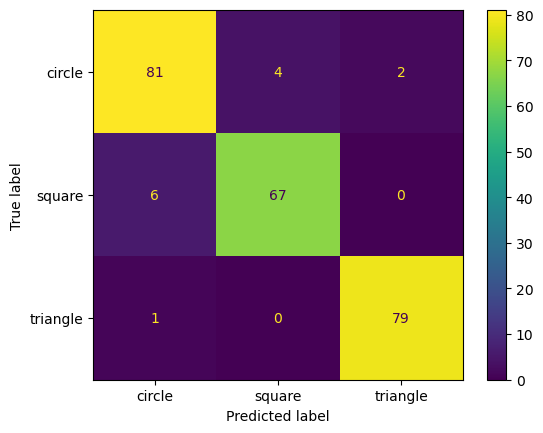

In [11]:
print('k-Nearest Neighbours (kNN) Classification')
n_neighbors = list(range(1,11))
knn = KNeighborsClassifier().fit(X_train, y_train)
hyperparameters = dict(n_neighbors=n_neighbors)
grid = GridSearchCV(knn, hyperparameters, cv=12)
grid.fit(X, y)
print('Best KNN Parameters:')
print(grid.best_params_)

print('k-Nearest Neighbours (kNN) using the best parameters:')
knn2 = KNeighborsClassifier(**grid.best_params_).fit(X_train, y_train)
print(f'Testing Accuracy: {knn2.score(X_test, y_test)}')
print(f'Training Accuracy: {knn2.score(X_train, y_train)}')
y_pred_knn2 = knn2.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred_knn2))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_knn2, labels=class_label)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot()
# plt.show()

## Support Vector Machine (SVM)

Support Vector Machine (SVM)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best SVM Parameters:
{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
Support Vector Machine (SVM) using the best parameters:
Testing Accuracy: 0.8791666666666667
Training Accuracy: 1.0
Classification Report: 
              precision    recall  f1-score   support

      circle       0.86      0.85      0.86        87
      square       0.85      0.86      0.86        73
    triangle       0.93      0.93      0.93        80

    accuracy                           0.88       240
   macro avg       0.88      0.88      0.88       240
weighted avg       0.88      0.88      0.88       240

Confusion Matrix: 
[[74  9  4]
 [ 8 63  2]
 [ 4  2 74]]


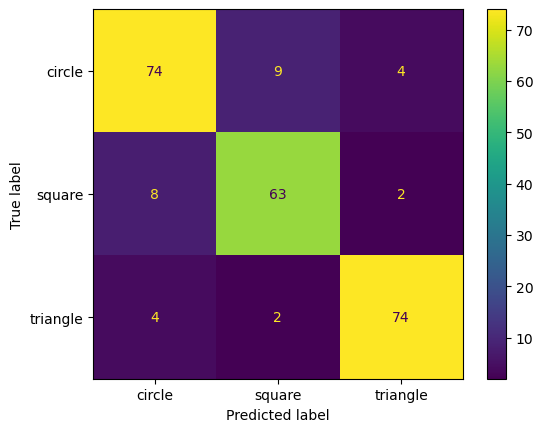

In [7]:
print('Support Vector Machine (SVM)')
svc = SVC().fit(X_train, y_train)
params = dict(kernel= ['rbf','linear'], C=[0.001, 0.01, 0.1, 1, 10], gamma=[0.001, 0.01, 0.1, 1, 10])
grid = GridSearchCV(svc, params, n_jobs=-1, verbose=2)
grid.fit(X, y)
print('Best SVM Parameters:')
print(grid.best_params_)

print('Support Vector Machine (SVM) using the best parameters:')
svc2 = SVC(**grid.best_params_).fit(X_train, y_train)
print(f'Testing Accuracy: {svc2.score(X_test, y_test)}')
print(f'Training Accuracy: {svc2.score(X_train, y_train)}')
y_pred_svc2 = svc2.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred_svc2))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_svc2, labels=class_label)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot(cmap='magma')
# plt.show()

## Decision Tree

Decision Tree
Best Decision Tree Parameters: 
{'max_depth': 10}
Decision Tree using best parameters
Testing Accuracy: 0.825
Training Accuracy: 0.9635416666666666
Classification Report: 
              precision    recall  f1-score   support

      circle       0.78      0.75      0.76        87
      square       0.88      0.79      0.83        73
    triangle       0.82      0.94      0.88        80

    accuracy                           0.82       240
   macro avg       0.83      0.83      0.83       240
weighted avg       0.83      0.82      0.82       240

Confusion Matrix: 
[[65  7 15]
 [14 58  1]
 [ 4  1 75]]


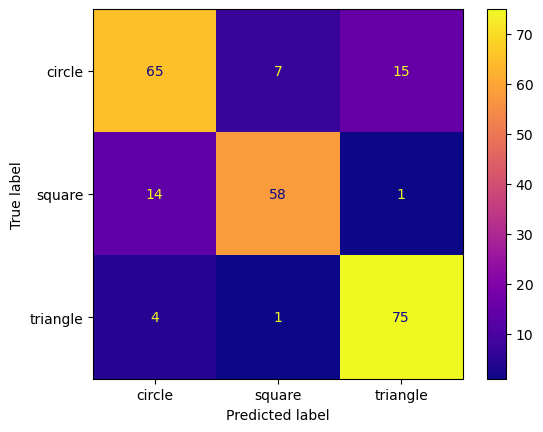

In [8]:
print('Decision Tree')
max_depth = list(range(1,11))
dtc = DecisionTreeClassifier().fit(X_train, y_train)
hyperparameters = dict(max_depth=max_depth)
grid = GridSearchCV(dtc, hyperparameters, cv=12)
grid.fit(X, y)
print('Best Decision Tree Parameters: ')
print(grid.best_params_)

print('Decision Tree using best parameters')
dtc2 = DecisionTreeClassifier(**grid.best_params_).fit(X_train, y_train)
print(f'Testing Accuracy: {dtc2.score(X_test, y_test)}')
print(f'Training Accuracy: {dtc2.score(X_train, y_train)}')
y_pred_dtc2 = dtc2.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred_dtc2))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_dtc2, labels=class_label)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot(cmap='plasma')
# plt.show()

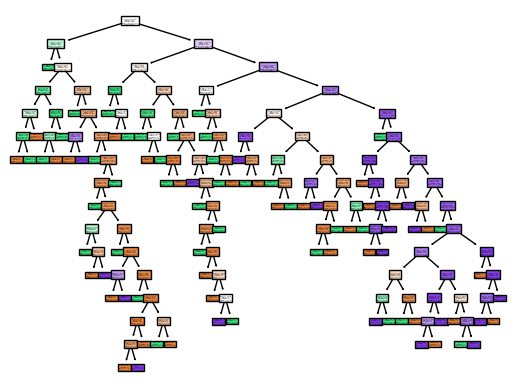

In [5]:
tree.plot_tree(dtc,
               class_names = class_label,
               filled = True);

## Univariate Selection

In [9]:
print('Univariate Selection')
# Feature extraction
test = SelectKBest(score_func=chi2, k=512)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print('Selecting top 10 best features:')
print(features)
print(features.shape)

new_X = features
X_train, X_test, y_train, y_test= train_test_split(new_X, y, test_size=0.2, random_state=42)

Univariate Selection
[ 70.6   179.927 446.92  ... 500.633 287.329 120.202]
Selecting top 10 best features:
[[ 47   4   4 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ...  39 255 255]]
(1200, 512)


### a) KNN after Univariate selection

K-Nearest Neighbours Classification


C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

Best KNN Parameters:
{'n_neighbors': 1}
k-Nearest Neighbours (kNN) using the best parameters:
Testing Accuracy: 0.9458333333333333
Training Accuracy: 1.0
Classification Report: 
              precision    recall  f1-score   support

      circle       0.92      0.93      0.93        87
      square       0.94      0.92      0.93        73
    triangle       0.98      0.99      0.98        80

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240

Confusion Matrix: 
[[81  4  2]
 [ 6 67  0]
 [ 1  0 79]]


C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


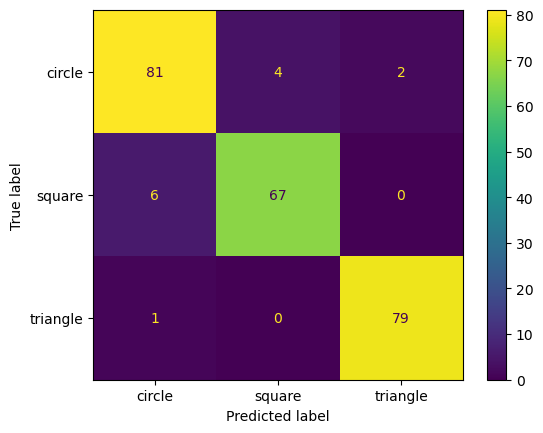

In [10]:
print('K-Nearest Neighbours Classification')
n_neighbors = list(range(1,11))

knn = KNeighborsClassifier().fit(X_train, y_train)
hyperparameters = dict(n_neighbors=n_neighbors)
grid = GridSearchCV(knn, hyperparameters, cv=10)
grid.fit(X, y)
print('Best KNN Parameters:')
print(grid.best_params_)

print('k-Nearest Neighbours (kNN) using the best parameters:')
knn2 = KNeighborsClassifier(**grid.best_params_).fit(X_train, y_train)
print(f'Testing Accuracy: {knn2.score(X_test, y_test)}')
print(f'Training Accuracy: {knn2.score(X_train, y_train)}')
y_pred_knn2 = knn2.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred_knn2))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_knn2, labels=class_label)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot()
# plt.show()

### b) SVM after Univariate selection

In [10]:
print('Support Vector Machine (SVM)')
svc = SVC().fit(X_train, y_train)
params = dict(kernel= ['rbf','linear'], C=[0.001, 0.01, 0.1, 1, 10], gamma=[0.001, 0.01, 0.1, 1, 10])
grid = GridSearchCV(svc, params, n_jobs=-1, verbose=2)
grid.fit(X, y)
print('Best SVM Parameters:')
print(grid.best_params_)

print('Support Vector Machine (SVM) using the best parameters:')
svc2 = SVC(**grid.best_params_).fit(X_train, y_train)
print(f'Testing Accuracy: {svc2.score(X_test, y_test)}')
print(f'Training Accuracy: {svc2.score(X_train, y_train)}')
y_pred_svc2 = svc2.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred_svc2))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_svc2, labels=class_label)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot(cmap='magma')
# plt.show()

Support Vector Machine (SVM)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best SVM Parameters:
{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
Support Vector Machine (SVM) using the best parameters:
Testing Accuracy: 0.725
Training Accuracy: 1.0
Classification Report: 
              precision    recall  f1-score   support

      circle       0.69      0.63      0.66        87
      square       0.65      0.73      0.69        73
    triangle       0.84      0.82      0.83        80

    accuracy                           0.73       240
   macro avg       0.73      0.73      0.73       240
weighted avg       0.73      0.72      0.72       240

Confusion Matrix: 
[[55 23  9]
 [16 53  4]
 [ 9  5 66]]


### c) Decision Tree after Univariate selection

Decision Tree
Best Decision Tree Parameters:
{'max_depth': 10}
Decision Tree using best parameters
Testing Accuracy: 0.8375
Training Accuracy: 0.978125
Classification Report: 
              precision    recall  f1-score   support

      circle       0.84      0.76      0.80        87
      square       0.85      0.82      0.83        73
    triangle       0.83      0.94      0.88        80

    accuracy                           0.84       240
   macro avg       0.84      0.84      0.84       240
weighted avg       0.84      0.84      0.84       240

Confusion Matrix: 
[[66  9 12]
 [10 60  3]
 [ 3  2 75]]


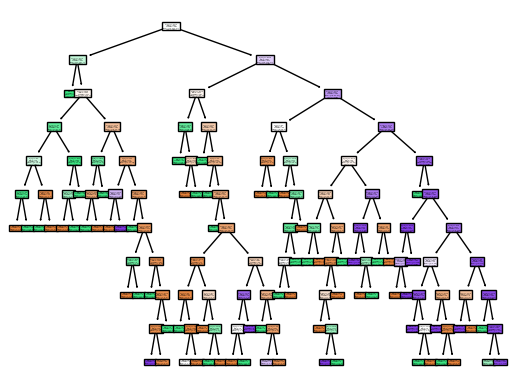

In [11]:
print('Decision Tree')
max_depth = list(range(1,11))
dtc = DecisionTreeClassifier().fit(X_train, y_train)
hyperparameters = dict(max_depth=max_depth)
grid = GridSearchCV(dtc, hyperparameters, cv=10)
grid.fit(X, y)
print('Best Decision Tree Parameters:')
print(grid.best_params_)

print('Decision Tree using best parameters')
dtc2 = DecisionTreeClassifier(**grid.best_params_).fit(X_train, y_train)
print(f'Testing Accuracy: {dtc2.score(X_test, y_test)}')
print(f'Training Accuracy: {dtc2.score(X_train, y_train)}')
y_pred_dtc2 = dtc2.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred_dtc2))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_dtc2, labels=class_label)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot(cmap='plasma')
# plt.show()

tree.plot_tree(dtc2,
               class_names = class_label,
               filled = True);

After using univariate selection
- KNN tetsing accuracy increases (k=1) from 93.33 to 94.58
- SVM accuracy decreases (kernel=linear, C=0.001, gamma=0.001) from 0.88 to 0.73
- Decision Tree accuracy slightly changes

## Model-based Selection

In [12]:
print('Model-based Selection')
# Feature extraction
test = SelectFromModel(RandomForestClassifier(), threshold='median')
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)

features = fit.transform(X)
# Summarize selected features
print('Selecting top 10 best features:')
print(features)
print(features.shape)

new_X2 = features
X_train, X_test, y_train, y_test= train_test_split(new_X2, y, test_size=0.2, random_state=42)

Model-based Selection
Selecting top 10 best features:
[[255 255   4 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 216 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ...   8   8 255]]
(1200, 512)


### a) KNN after Model-based Selection

In [13]:
print('K-Nearest Neighbours Classification')
n_neighbors = list(range(1,11))

knn = KNeighborsClassifier().fit(X_train, y_train)
hyperparameters = dict(n_neighbors=n_neighbors)
grid = GridSearchCV(knn, hyperparameters, cv=10)
grid.fit(X, y)
print('Best KNN Parameters:')
print(grid.best_params_)

print('k-Nearest Neighbours (kNN) using the best parameters:')
knn2 = KNeighborsClassifier(**grid.best_params_).fit(X_train, y_train)
print(f'Testing Accuracy: {knn2.score(X_test, y_test)}')
print(f'Training Accuracy: {knn2.score(X_train, y_train)}')
y_pred_knn2 = knn2.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred_knn2))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_knn2, labels=class_label)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot()
# plt.show()

K-Nearest Neighbours Classification


C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

Best KNN Parameters:
{'n_neighbors': 1}
k-Nearest Neighbours (kNN) using the best parameters:
Testing Accuracy: 0.9458333333333333
Training Accuracy: 1.0
Classification Report: 
              precision    recall  f1-score   support

      circle       0.93      0.93      0.93        87
      square       0.93      0.92      0.92        73
    triangle       0.98      0.99      0.98        80

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240

Confusion Matrix: 
[[81  4  2]
 [ 6 67  0]
 [ 0  1 79]]


C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### b) SVM after Model-based Selection 

In [14]:
print('Support Vector Machine (SVM)')
svc = SVC().fit(X_train, y_train)
params = dict(kernel= ['rbf','linear'], C=[0.001, 0.01, 0.1, 1, 10], gamma=[0.001, 0.01, 0.1, 1, 10])
grid = GridSearchCV(svc, params, n_jobs=-1, verbose=2)
grid.fit(X, y)
print('Best SVM Parameters:')
print(grid.best_params_)

print('Support Vector Machine (SVM) using the best parameters:')
svc2 = SVC(**grid.best_params_).fit(X_train, y_train)
print(f'Testing Accuracy: {svc2.score(X_test, y_test)}')
print(f'Training Accuracy: {svc2.score(X_train, y_train)}')
y_pred_svc2 = svc2.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred_svc2))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_svc2, labels=class_label)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot(cmap='magma')
# plt.show()

Support Vector Machine (SVM)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best SVM Parameters:
{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
Support Vector Machine (SVM) using the best parameters:
Testing Accuracy: 0.8541666666666666
Training Accuracy: 1.0
Classification Report: 
              precision    recall  f1-score   support

      circle       0.85      0.80      0.83        87
      square       0.82      0.84      0.83        73
    triangle       0.88      0.93      0.90        80

    accuracy                           0.85       240
   macro avg       0.85      0.86      0.85       240
weighted avg       0.85      0.85      0.85       240

Confusion Matrix: 
[[70 10  7]
 [ 9 61  3]
 [ 3  3 74]]


### c) Decision Tree after Model-based Selection 

Decision Tree
Best Decision Tree Parameters:
{'max_depth': 9}
Decision Tree using best parameters
Testing Accuracy: 0.825
Training Accuracy: 0.9552083333333333
Classification Report: 
              precision    recall  f1-score   support

      circle       0.79      0.79      0.79        87
      square       0.85      0.82      0.83        73
    triangle       0.84      0.86      0.85        80

    accuracy                           0.82       240
   macro avg       0.83      0.83      0.83       240
weighted avg       0.83      0.82      0.82       240

Confusion Matrix: 
[[69  7 11]
 [11 60  2]
 [ 7  4 69]]


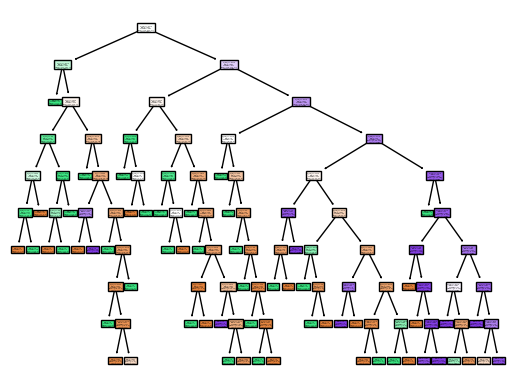

In [15]:
print('Decision Tree')
max_depth = list(range(1,11))
dtc = DecisionTreeClassifier().fit(X_train, y_train)
hyperparameters = dict(max_depth=max_depth)
grid = GridSearchCV(dtc, hyperparameters, cv=10)
grid.fit(X, y)
print('Best Decision Tree Parameters:')
print(grid.best_params_)

print('Decision Tree using best parameters')
dtc2 = DecisionTreeClassifier(**grid.best_params_).fit(X_train, y_train)
print(f'Testing Accuracy: {dtc2.score(X_test, y_test)}')
print(f'Training Accuracy: {dtc2.score(X_train, y_train)}')
y_pred_dtc2 = dtc2.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred_dtc2))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_dtc2, labels=class_label)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot(cmap='plasma')
# plt.show()

tree.plot_tree(dtc2,
               class_names = class_label,
               filled = True);

After using Model-based selection
- KNN accuracy testing increases (k=1) from 93.33 to 95.83
- SVM accuracy testing decreases (kernel=linear C=0.001 gamma=0.001) from 0.88 to 0.85
- Decision Tree accuracy slightly changes

# Conclusion

- KNN accuracy improves better by using Model-based selection
- SVM does not improve its accuracy by using either one of the feature selection
- Decision Tree accuracy does not improve by using either one of the feature selection